In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

In [3]:
tv_shows=pd.read_csv('./tv_shows.csv')

In [4]:
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [5]:
tv_shows['Rotten Tomatoes']=tv_shows['Rotten Tomatoes'].str.rstrip('%').astype('float')

In [6]:
tv_shows['Age']=tv_shows['Age'].str.rstrip('+')

In [7]:
tv_shows['Age'] = pd.to_numeric(tv_shows['Age'],errors='coerce')

In [8]:
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0,1
1,1,Stranger Things,2016,16.0,8.8,93.0,1,0,0,0,1
2,2,Money Heist,2017,18.0,8.4,91.0,1,0,0,0,1
3,3,Sherlock,2010,16.0,9.1,78.0,1,0,0,0,1
4,4,Better Call Saul,2015,18.0,8.7,97.0,1,0,0,0,1


In [9]:
tv_shows.shape

(5611, 11)

In [10]:
tv_shows.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2991
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [11]:
tv_shows.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2991
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [12]:
tv_shows.shape

(5611, 11)

<AxesSubplot:ylabel='Frequency'>

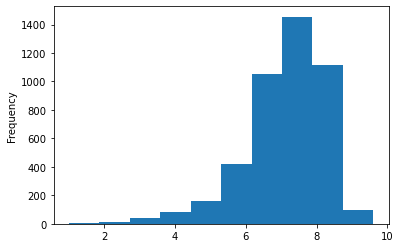

In [13]:
tv_shows["IMDb"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

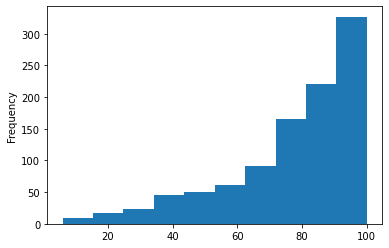

In [14]:
tv_shows["Rotten Tomatoes"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

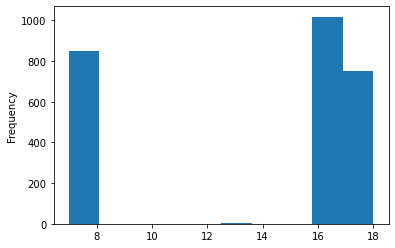

In [15]:
tv_shows["Age"].plot.hist()

<AxesSubplot:xlabel='IMDb', ylabel='Title'>

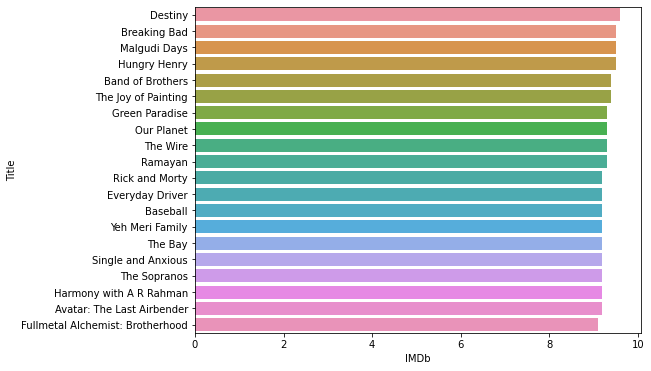

In [16]:
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= tv_shows.sort_values("IMDb",ascending=False).head(20))

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Title'>

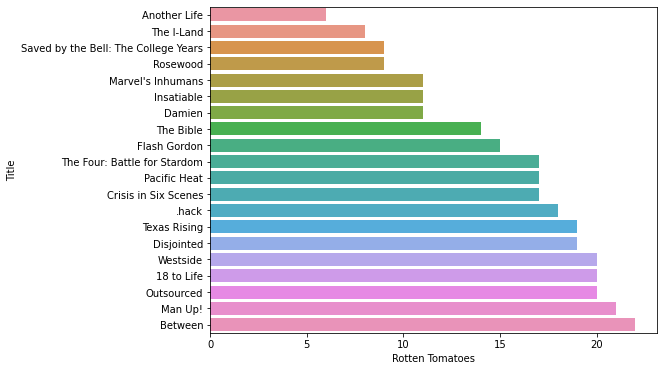

In [17]:
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= tv_shows.sort_values("Rotten Tomatoes",ascending=True).head(20))

In [18]:
ratings=tv_shows[["Title",'IMDb',"Rotten Tomatoes"]]
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,9.5,96.0
1,Stranger Things,8.8,93.0
2,Money Heist,8.4,91.0
3,Sherlock,9.1,78.0
4,Better Call Saul,8.7,97.0


In [19]:
len(ratings)

5611

In [20]:
ratings=ratings.dropna()

In [21]:
len(ratings)

1008

In [22]:
ratings['IMDb']=ratings['IMDb']*10

In [23]:
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,95.0,96.0
1,Stranger Things,88.0,93.0
2,Money Heist,84.0,91.0
3,Sherlock,91.0,78.0
4,Better Call Saul,87.0,97.0


In [24]:
X=ratings[['IMDb','Rotten Tomatoes']]

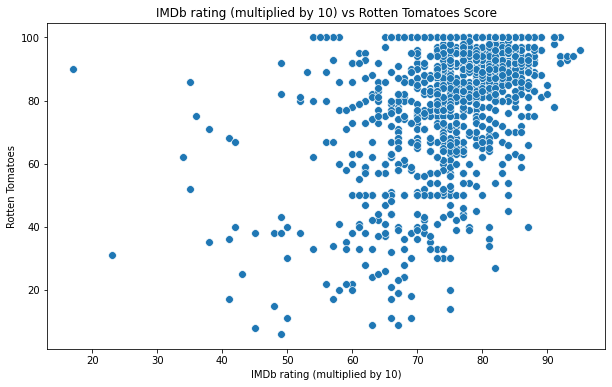

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',  data = X  ,s = 60 )
plt.xlabel('IMDb rating (multiplied by 10)')
plt.ylabel('Rotten Tomatoes') 
plt.title('IMDb rating (multiplied by 10) vs Rotten Tomatoes Score')
plt.show()

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
gmm = GaussianMixture(n_components = 3)

In [28]:
gmm.fit(X)
  
# Assign a label to each sample
labels = gmm.predict(X)
ratings['labels2']= labels


In [29]:
ratings.head()

,Title,IMDb,Rotten Tomatoes,labels2
0,Breaking Bad,95.0,96.0,1
1,Stranger Things,88.0,93.0,1
2,Money Heist,84.0,91.0,1
3,Sherlock,91.0,78.0,2
4,Better Call Saul,87.0,97.0,1


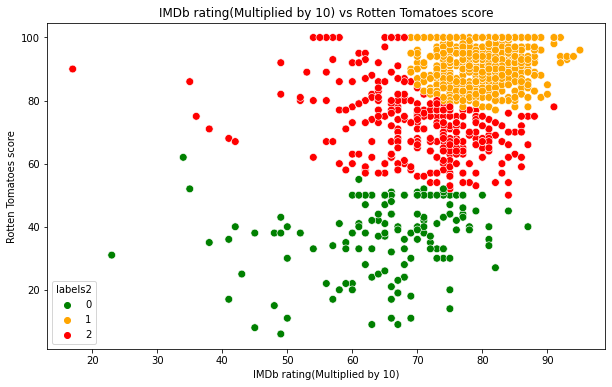

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',hue="labels2",  
                 palette=['green','orange','red'], legend='full',data = ratings  ,s = 60 )

plt.xlabel('IMDb rating(Multiplied by 10)')
plt.ylabel('Rotten Tomatoes score') 
plt.title('IMDb rating(Multiplied by 10) vs Rotten Tomatoes score')
plt.show()


In [31]:
l1=ratings[ratings["labels2"]==0]["IMDb"].values

In [32]:
max(l1)

87.0

In [33]:
min(l1)

23.0

In [34]:
l2=ratings[ratings["labels2"]==2]["IMDb"].values

In [35]:
max(l2)

91.0

In [36]:
min(l2)

17.0

In [37]:
l3=ratings[ratings["labels2"]==1]["IMDb"].values

In [38]:
max(l3)

95.0

In [39]:
min(l3)

69.0

In [40]:
ratings['labels2'] = ratings['labels2'].replace([0],'Excellent')

In [41]:
ratings['labels2'] = ratings['labels2'].replace([1],'Good')

In [42]:
ratings['labels2'] = ratings['labels2'].replace([2],'Average')

In [43]:
ratings

,Title,IMDb,Rotten Tomatoes,labels2
0,Breaking Bad,95.0,96.0,Good
1,Stranger Things,88.0,93.0,Good
2,Money Heist,84.0,91.0,Good
3,Sherlock,91.0,78.0,Average
4,Better Call Saul,87.0,97.0,Good
...,...,...,...,...
5509,Diary of a Future President,55.0,100.0,Average
5517,Encore!,74.0,68.0,Average
5522,Spider-Man Unlimited,65.0,50.0,Excellent
5530,The Super Hero Squad Show,61.0,50.0,Excellent


In [44]:
data = [ratings["Title"], ratings["labels2"]]  

In [45]:
moviereviews=pd.concat(data,axis=1)

In [46]:
moviereviews

,Title,labels2
0,Breaking Bad,Good
1,Stranger Things,Good
2,Money Heist,Good
3,Sherlock,Average
4,Better Call Saul,Good
...,...,...
5509,Diary of a Future President,Average
5517,Encore!,Average
5522,Spider-Man Unlimited,Excellent
5530,The Super Hero Squad Show,Excellent


In [48]:
a = input("enter the movie name")
print(moviereviews[moviereviews["Title"]==a]["labels2"].values)

enter the movie nameEncore!
['Average']


In [61]:
!pip install imdbpy

In [2]:
!pip install IMDbPY

In [1]:
from imdb import IMDb

In [9]:
import imdb
   
# creating instance of IMDb
ia = imdb.IMDb()
   
# name 
name = "Bade Achhe Lagte Hain 2"
   
# searching the name 
search = ia.search_movie(name)
  
  
# loop for printing the name and id
      
# getting the id
id = search[0].movieID

series = ia.get_movie(id)
  
# getting rating of the series
rating = series.data['rating']
  
# printing the object i.e name
print(series)
  
# print the rating
print(rating)


Bade Achhe Lagte Hain 2
7.2
